In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern

np.random.seed(1)

df = pd.read_excel('NCAA data.xlsx', sheet_name='2016-2017 ')

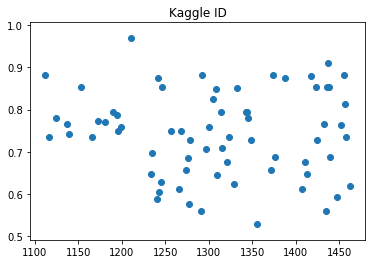

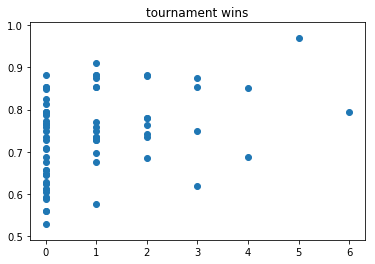

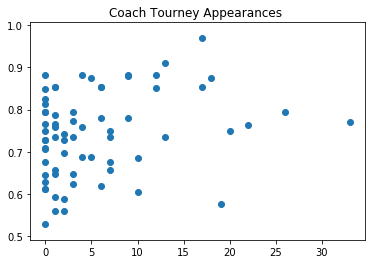

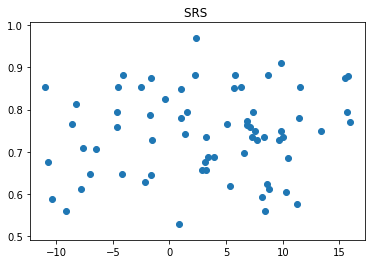

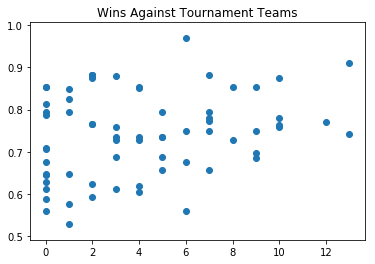

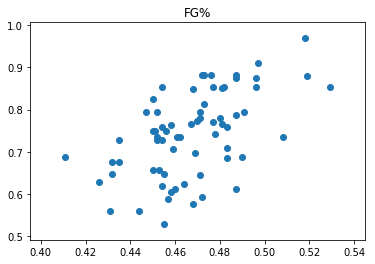

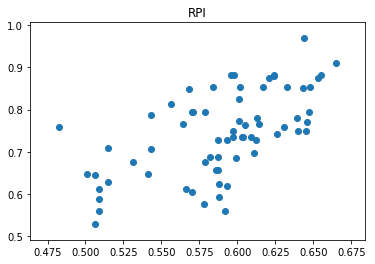

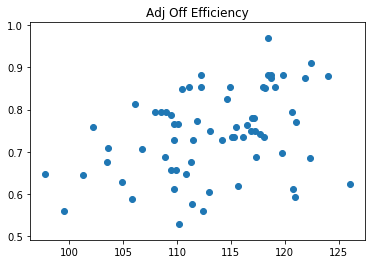

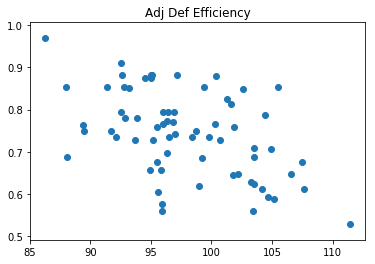

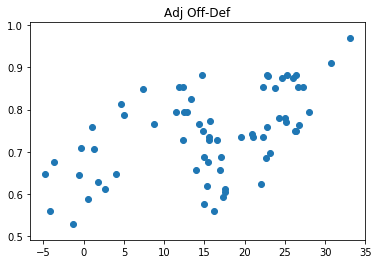

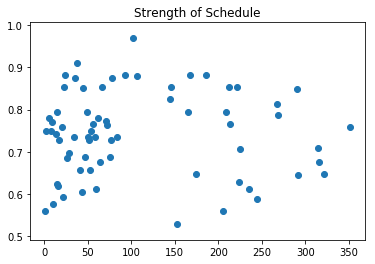

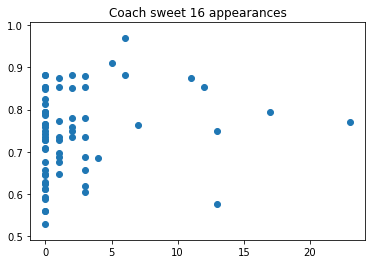

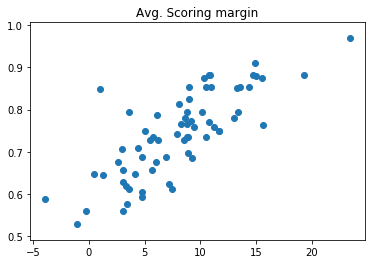

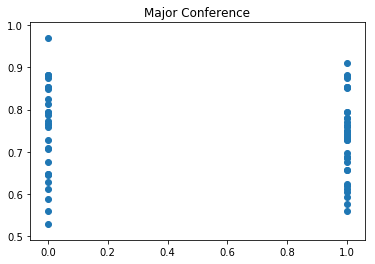

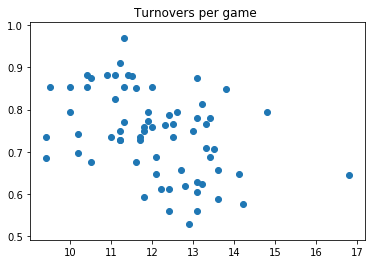

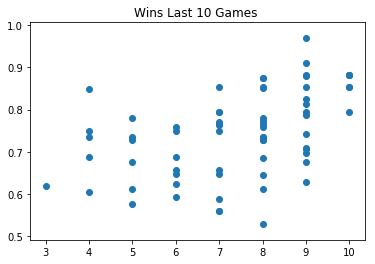

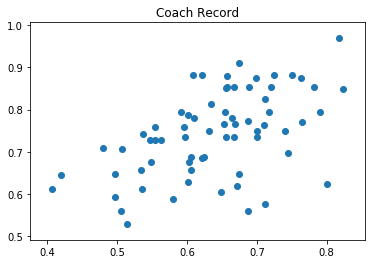

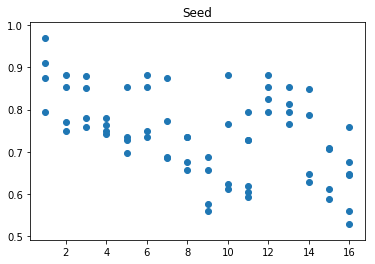

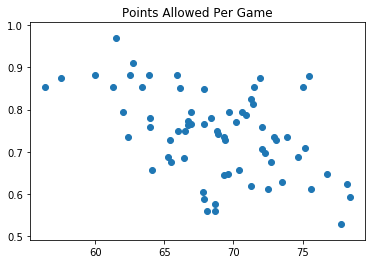

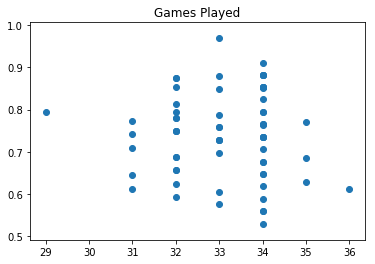

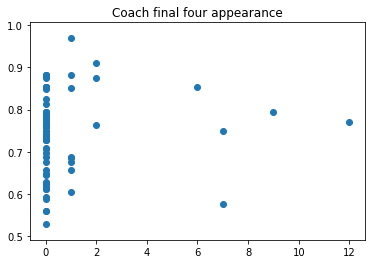

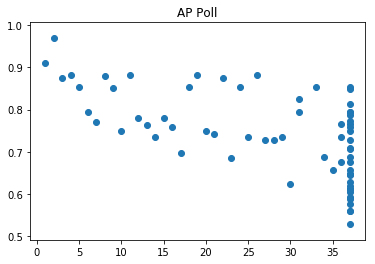

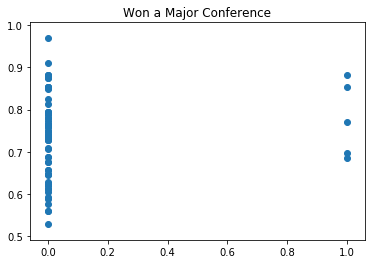

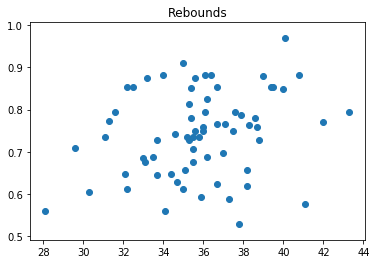

In [2]:
y = np.array(df['Win %'])

for var in list(df):
    if var != 'Win %' and var != 'Team Name':
        plt.scatter(np.array(df[var]), y)
        plt.title(var)
        plt.show()

In [3]:
# Filter out shit teams
df = df[df['tournament wins'] > 0] #np.mean(df['tournament wins']) + 0.5 * np.std(df['tournament wins'])]
y = np.array(df['Win %'])

# Z-Score-ify
df['Rebounds'] = (df['Rebounds'] - np.mean(df['Rebounds'])) / np.std(df['Rebounds'])
df['Adj Off Efficiency'] = (df['Adj Off Efficiency'] - np.mean(df['Adj Off Efficiency'])) / np.std(df['Adj Off Efficiency'])

# Select relevant vars
rel_names = ['Rebounds', 'Adj Off Efficiency']
rel = df[rel_names]
x = np.array(rel)
y = y[~np.isnan(y)]

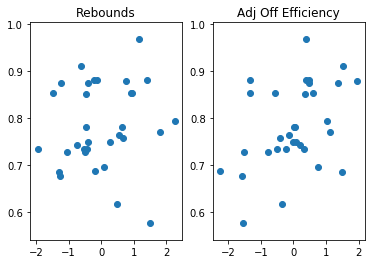

In [4]:
for var in range(x.shape[1]):
    plt.subplot(121 + var)
    plt.title(rel_names[var])
    plt.scatter(x[:, var], y)
plt.show()

GP Regression R^2: 0.9999999423574788


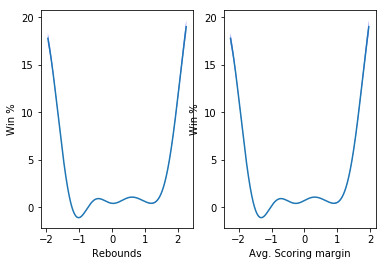

In [6]:
gp = GaussianProcessRegressor()
gp.fit(x, y)
print('GP Regression R^2: ' + str(gp.score(x, y)))

xtmp = np.linspace(np.array([np.min(x[:, 0]), np.min(x[:, 1])]),
                  np.array([np.max(x[:, 0]), np.max(x[:, 1])]), 1000)
ytmp, sigma = gp.predict(xtmp, return_std=True)

plt.subplot(121)
vtmp = xtmp[:, 0]
plt.plot(vtmp, ytmp)
plt.fill(np.concatenate([vtmp, vtmp[::-1]]),
         np.concatenate([ytmp - 1.5 * sigma,
                        (ytmp + 1.5 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('Rebounds')
plt.ylabel('Win %')

plt.subplot(122)
vtmp = xtmp[:, 1]
plt.plot(vtmp, ytmp)
plt.fill(np.concatenate([vtmp, vtmp[::-1]]),
         np.concatenate([ytmp - 1.5 * sigma,
                        (ytmp + 1.5 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('Avg. Scoring margin')
plt.ylabel('Win %')

plt.show()